In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

c:\users\yeongjoon\appdata\local\continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

# 입력에 대한 가중치
W = np.random.random((output_features, input_features))
# 이전 상태에 대한 가중치
U = np.random.random((output_features, output_features))
# 편향
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis = 0)

In [3]:
final_output_sequence.shape

(100, 64)

In [4]:
from keras.layers import SimpleRNN, Embedding
from keras.models import Sequential

In [5]:
# input_features == 10000
# output_features == 32

# 마지막 타임스텝의 출력만 반환
model1 = Sequential()
model1.add(Embedding(10000, 32))
model1.add(SimpleRNN(32))
model1.summary()

# 각 타임스텝의 출력을 모은 전체 시퀀스 반환
model2 = Sequential()
model2.add(Embedding(10000, 32))
model2.add(SimpleRNN(32, return_sequences=True))
model2.summary()

# 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)
print('y_train 크기:', y_train.shape)

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)
y_train 크기: (25000,)


In [7]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

+ 첫번째 인자(input_dim) : 단어 사전의 크기를 말하며 총 20,000개의 단어 종류가 있다는 의미입니다. 이 값은 앞서 imdb.load_data() 함수의 num_words 인자값과 동일해야 합니다.
+ 두번째 인자(output_dim) : 단어를 인코딩 한 후 나오는 벡터 크기 입니다. 이 값이 128이라면 단어를 128차원의 의미론적 기하공간에 나타낸다는 의미입니다. 단순하게 빈도수만으로 단어를 표시한다면, 10과 11은 빈도수는 비슷하지만 단어로 볼 때는 전혀 다른 의미를 가지고 있습니다. 하지만 의미론적 기하공간에서는 거리가 가까운 두 단어는 의미도 유사합니다. 즉 임베딩 레이어는 입력되는 단어를 의미론적으로 잘 설계된 공간에 위치시켜 벡터로 수치화 시킨다고 볼 수 있습니다.
+ input_length : 단어의 수 즉 문장의 길이를 나타냅니다. 임베딩 레이어의 출력 크기는 샘플 수 * output_dim * input_lenth가 됩니다. 임베딩 레이어 다음에 Flatten 레이어가 온다면 반드시 input_lenth를 지정해야 합니다. 플래튼 레이어인 경우 입력 크기가 알아야 이를 1차원으로 만들어서 Dense 레이어에 전달할 수 있기 때문입니다.

In [8]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32)) # output = (time_steps, input_features, output_features)
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 16s 816us/step - loss: 0.6425 - acc: 0.6137 - val_loss: 0.5040 - val_acc: 0.7718
Epoch 2/10
20000/20000 [==============================] - 16s 792us/step - loss: 0.4114 - acc: 0.8257 - val_loss: 0.4667 - val_acc: 0.7962
Epoch 3/10
20000/20000 [==============================] - 16s 777us/step - loss: 0.2966 - acc: 0.8815 - val_loss: 0.4723 - val_acc: 0.7816
Epoch 4/10
20000/20000 [==============================] - 16s 791us/step - loss: 0.2248 - acc: 0.9130 - val_loss: 0.4046 - val_acc: 0.8292
Epoch 5/10
20000/20000 [==============================] - 16s 793us/step - loss: 0.1715 - acc: 0.9371 - val_loss: 0.4211 - val_acc: 0.8314
Epoch 6/10
20000/20000 [==============================] - 17s 854us/step - loss: 0.1126 - acc: 0.9613 - val_loss: 0.4066 - val_acc: 0.8592
Epoch 7/10
20000/20000 [==============================] - 18s 876us/s

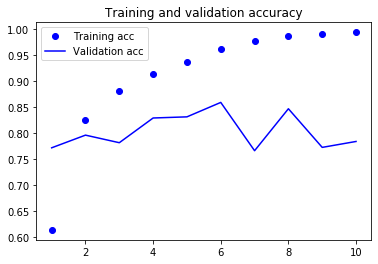

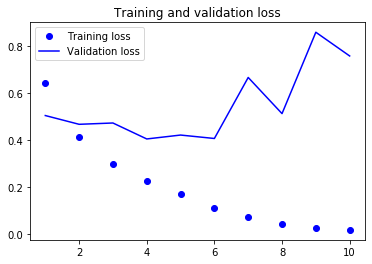

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.5149 - acc: 0.7591 - val_loss: 0.4039 - val_acc: 0.8486
Epoch 2/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2923 - acc: 0.8868 - val_loss: 0.3064 - val_acc: 0.8786
Epoch 3/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.2360 - acc: 0.9100 - val_loss: 0.3147 - val_acc: 0.8862
Epoch 4/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1964 - acc: 0.9291 - val_loss: 0.3113 - val_acc: 0.8664
Epoch 5/10
20000/20000 [==============================] - 42s 2ms/step - loss: 0.1736 - acc: 0.9379 - val_loss: 0.2823 - val_acc: 0.8832
Epoch 6/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.1534 - acc: 0.9443 - val_loss: 0.4010 - val_acc: 0.8746
Epoch 7/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.1434 - acc: 0.9491 - val_loss: 0.3511 - val_acc:

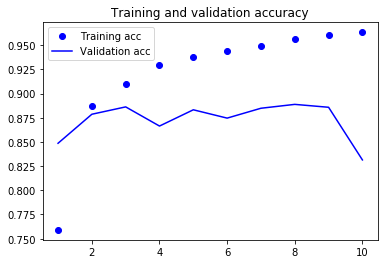

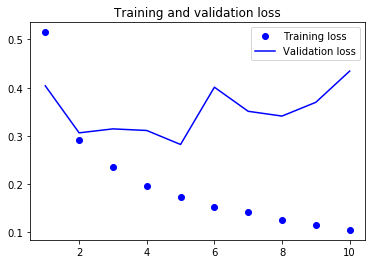

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 살펴볼 것

**순환 드롭아웃(recurrent dropout)** : 순환 층에서 과대적합을 방지

**스태킹 순환 층(stacking recurrent layer)** : 네트워크의 표현 능력을 증가시킴

**양방향 순환 층(bidirectional recurrent layer)** : 순환 네트워크에 같은 정보를 다른 방향으로 주입하여 정확도를 높이고 기억을 더 오래 유지시킴

*날씨 시계열 데이터셋 사용* : 독일 예나(Jena) 시에 있는 막스 플랑크 생물지구화학 연구소의 지상관측소에서 수집한 데이터로, 14개의 기온, 기압, 습도, 풍향 등의 관측치가 10분마다 기록되어 있다.

https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

In [12]:
import pandas as pd
jena_climate = pd.read_csv('jena_climate_2009_2016.csv')
jena_climate = jena_climate.drop('Date Time', axis=1)
print('data 개수: {}'.format(len(jena_climate)))
print('<header>\n{}'.format(jena_climate.columns))
jena_climate.head(5)

data 개수: 420551
<header>
Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


각 데이터는 시간 순서대로 나타나있으므로 각 row가 하나의 타임스텝이며 column은 input feature다.

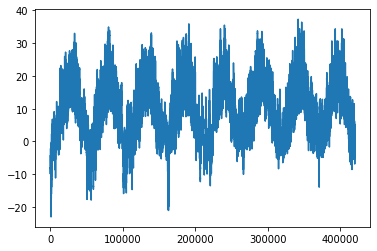

In [13]:
float_data = jena_climate.values

# 온도
temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)
plt.show()

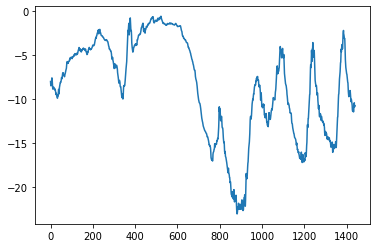

In [14]:
plt.plot(range(1440), temp[:1440])

+ 위는 처음 10일 간의 온도 데이터 그래프다.
+ 10분마다 하나의 데이터가 있으므로 1시간에 6개의 데이터, 1일에 24x6=144개의 데이터, 10일에는 1440개의 데이터가 있다.

연간 데이터 주기성이 안정적이기 때문에 지난 몇 달간 데이터를 사용하여 다음 달의 평균 온도를 예측하는 문제는 쉬운 편이다.

**하지만 일별 데이터를 살펴보면 온도 변화는 매우 불안정하다. 일자별 수준의 시계열 데이터를 예측할 수 있을까?**

### 1.데이터 정규화

In [15]:
mean = float_data[:200000].mean(axis=0) # 처음 20만개의 데이터만 사용
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

### 2. 데이터 제네레이터 생성

+ lookback : 얼마나 이전의 데이터로부터 학습할 것인가 - 어느 지점을 예측하기 위해 학습되는 데이터의 시작점을 결정
+ steps : 데이터를 어느 정도 간격으로 수집할 것인가 - 6으로 하면 여기선 1시간마다 데이터 포인터를 샘플링하게 된다.
+ delay : 얼마 뒤의 데이터를 예측할 것인가 - 예측할 미래의 지점을 결정

In [22]:
def generator(data, lookback, delay, min_index, max_index, shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    
    # rows는 현재 지점(기준점)의 samples라고 생각하면 됨
    # batch_size만큼 지점을 선택
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        
        # lookback // step : 학습될 타임스텝 수
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

### 3. 학습 준비

In [23]:
lookback = 1440  # 10일 -> 10일 간의 데이터를 학습
step = 6  # 1시간
delay = 144  # 1일 -> 하루 뒤 온도를 예측
batch_size = 128

train_gen = generator(float_data, lookback=lookback, delay=delay, min_index=0, max_index=200000, shuffle=True, step=step, batch_size=batch_size)
val_gen = generator(float_data, lookback=lookback, delay=delay, min_index=200001, max_index=300000, step=step, batch_size=batch_size)
test_gen = generator(float_data, lookback=lookback, delay=delay, min_index=300001, max_index=None, step=step, batch_size=batch_size)
# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수 
val_steps = (300000 - 200001 - lookback) // batch_size

### 4. 모델 구축 및 학습

GRU layer는 LSTM과 같은 원리로 작동하지만 조금 더 간결하고 계산 비용이 덜 든다.

In [24]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=20, validation_data=val_gen, validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 90s 181ms/step - loss: 0.3032 - val_loss: 0.2766
Epoch 2/20
500/500 [==============================] - 85s 170ms/step - loss: 0.2857 - val_loss: 0.2682
Epoch 3/20
500/500 [==============================] - 98s 197ms/step - loss: 0.2787 - val_loss: 0.2638
Epoch 4/20
500/500 [==============================] - 100s 200ms/step - loss: 0.2753 - val_loss: 0.2605
Epoch 5/20
500/500 [==============================] - 97s 193ms/step - loss: 0.2679 - val_loss: 0.2623
Epoch 6/20
500/500 [==============================] - 93s 187ms/step - loss: 0.2608 - val_loss: 0.2641
Epoch 7/20
500/500 [==============================] - 92s 185ms/step - loss: 0.2596 - val_loss: 0.2627
Epoch 8/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2554 - val_loss: 0.2668
Epoch 9/20
500/500 [==============================] - 97s 194ms/step - loss: 0.2515 - val_loss: 0.2648
Epoch 10/20
500/500 [==============================] - 100s 199ms/step -

KeyboardInterrupt: 

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 5. 순환 드롭아웃 사용

**일반적인 Dropout**

\begin{split}\begin{aligned}
    h & = \sigma(W_1 x + b_1) \\
    o & = W_2 h + b_2 \\
    \hat{y} & = \mathrm{softmax}(o)
\end{aligned}\end{split}

**LSTM Dropout**

http://nmhkahn.github.io/RNN-Regularizations

순환 신경망은 일반적인 드롭아웃처럼 적용하면 오히려 학습에 방해가 된다.

타임스텝마다 랜덤하게 드롭아웃 마스크를 바꾸는 것이 아닌 동일한 드롭아웃 마스크(동일한 유닛의 드롭 패턴)를 모든 타임스텝에 적용해야 한다.

즉, 규제를 위해서는 순환 층 내부 계산에 사용된 활성화 함수에 타임스텝마다 동일한 드롭아웃 마스크를 적용해야 한다.

![](http://nmhkahn.github.io/assets/RNN-Reg/p1-dropout.png)

위의 점선이 dropout이 적용된 것이고 실선은 적용되지 않은 것 => **현재 timestep에서 들어온 입력값 혹은 이전 레이어의 값만 dropout**하는 의미다.

In [ ]:
model = Sequential()
model.add(layers.GRU(32, dropout=0.2, recurrent_dropout=0.2, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen, steps_per_epoch=500, epochs=40, validation_data=val_gen, validation_steps=val_steps)